# U3L3.4
## Challenge -
Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:
1. Vanilla logistic regression
2. Ridge logistic regression
3. Lasso logistic regression

 for classification

If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

### We would like to predict if the city will be classified as a murder one or safe!

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
# from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [4]:
link = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'

indices_to_skip = np.array([0,1,2,353,354,355])

df = pd.read_csv(link,skiprows=indices_to_skip , header=1)

df.tail()


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,"10,685",3,0,nan,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0.000
345,Woodstock Town,"5,931",2,0,nan,0,0,2,58,13,45,0,nan
346,Yonkers,"199,134","1,036",6,nan,25,390,615,"2,368",470,"1,662",236,10.000
347,Yorktown Town,"36,643",15,0,nan,0,2,13,334,45,287,2,nan


In [5]:
df.shape

(348, 13)

In [47]:
df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object

In [7]:
# Not working:
new_cols = ['Murder','Rubberry']
def insert_cols(df):
    for i in range(len(new_cols)):
        #df[new_cols[i]]==np.nan
        return new_cols[i]
    
insert_cols(df)

'Murder'

### Replace ',' before converting to numeric:

In [8]:
cols = df.columns.drop(['City','Murder and\nnonnegligent\nmanslaughter','Rape\n(revised\ndefinition)1'])

# Replace ',' before converting to numeric:
df[cols]=df[cols].replace(',*','',regex=True)

# Convert to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


### >>> std in `Population` is huge, this is an outlier that kills the analysis!

Drop values in "Population" that are outliers (more than 3 stdev from the mean):

In [10]:
q = df["Population"].quantile(0.99)
df2=df[df["Population"] < q].sort_values('Population', ascending=False)

In [11]:
df2.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,344.000,344.000,344.000,0.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,185.000
mean,14152.573,33.078,0.334,nan,1.939,10.378,20.427,316.703,53.863,253.366,9.474,1.124
std,18876.821,105.876,1.560,nan,5.662,36.304,64.049,602.881,134.721,454.847,28.851,4.758
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2983.250,2.000,0.000,nan,0.000,0.000,1.000,39.000,6.000,31.000,0.000,0.000
50%,7106.000,6.000,0.000,nan,0.000,1.000,4.000,111.500,17.000,93.500,2.000,0.000
75%,17889.250,21.000,0.000,nan,2.000,5.000,13.250,334.750,50.000,275.500,7.000,1.000
max,143834.000,1192.000,21.000,nan,75.000,400.000,696.000,6473.000,1781.000,4298.000,394.000,57.000


In [12]:
# Create a new column from `Robbery` that has binary data based on condition:
#df2['Robbery2'] = np.where(df2['Robbery']>5, 1, 0)

# Check to make sure it worked.
#print(df2['Robbery'].groupby(df2['Robbery2']).describe())

In [13]:
df2.loc[df['Murder and\nnonnegligent\nmanslaughter']>0,'Murder']=1
df2.loc[df['Murder and\nnonnegligent\nmanslaughter']==0,'Murder']=0

In [14]:
df2.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Murder'],
      dtype='object')

In [15]:
df2=df2.drop(['City',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1'],axis=1)

In [16]:
df2.dtypes

Population                       int64
Violent\ncrime                   int64
Rape\n(legacy\ndefinition)2      int64
Robbery                          int64
Aggravated\nassault              int64
Property\ncrime                  int64
Burglary                         int64
Larceny-\ntheft                  int64
Motor\nvehicle\ntheft            int64
Arson3                         float64
Murder                         float64
dtype: object

In [17]:
# Fill 'na' with zeros:
df2['Arson3']=df2['Arson3'].fillna(0)

In [18]:
df2

,Population,Violent crime,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder
310,143834,1192,75,400,696,6473,1781,4298,394,57.000,1.000
7,118296,107,7,31,68,2118,204,1882,32,3.000,1.000
3,97956,791,30,227,526,4090,705,3243,142,0.000,1.000
126,96667,151,9,60,82,2303,332,1925,46,0.000,0.000
267,87204,57,5,9,41,567,88,466,13,0.000,1.000
57,80705,65,8,17,40,1515,99,1388,28,0.000,0.000
214,78800,175,5,81,89,1391,150,1172,69,0.000,0.000
53,78361,158,11,48,99,2689,345,2271,73,2.000,0.000
62,78215,63,0,31,32,1990,186,1753,51,10.000,0.000
206,68071,554,7,228,317,1436,317,972,147,0.000,1.000


# We would like to predict if the city will be classified as a murder one or safe!

In [19]:
murder_df = df2

### There are a few big outliers !
We need feature transformation: drop outliers, apply log, cube etc

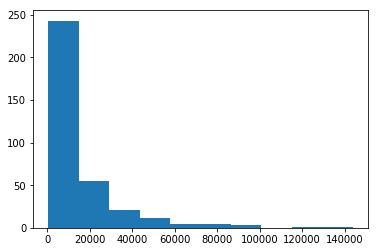

In [48]:
plt.hist(murder_df['Population'],bins=10)
plt.show()

In [21]:
# Who are the biggest towns ?
murder_df.sort_values('Population', ascending=False).head(5)

,Population,Violent crime,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder
310,143834,1192,75,400,696,6473,1781,4298,394,57.000,1.000
7,118296,107,7,31,68,2118,204,1882,32,3.000,1.000
3,97956,791,30,227,526,4090,705,3243,142,0.000,1.000
126,96667,151,9,60,82,2303,332,1925,46,0.000,0.000
267,87204,57,5,9,41,567,88,466,13,0.000,1.000


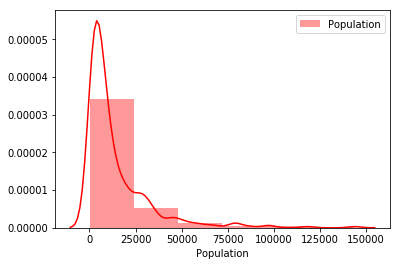

In [22]:
import seaborn as sns

sns.distplot( murder_df["Population"] , color="red", label="Population",bins=6)
plt.legend()
plt.show()

In [23]:
# Reset index b/c some rows are missing after processing the dataframe and 'concatenate' will not be done properly!
murder_df.reset_index(drop=True, inplace=True)

In [24]:
# Standardize each column:
from sklearn import preprocessing

names = murder_df.drop(['Murder'],axis=1).columns
# murder_df_scaled = pd.DataFrame(preprocessing.scale(murder_df.drop(['Murder'],axis=1)), columns=names)
murder_df_scaled = pd.DataFrame(preprocessing.scale(murder_df.loc[:, ~(murder_df.columns).isin(['Murder'])]), columns=names)

In [50]:
murder_df_scaled.head()

,Population,Violent crime,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder
0,6.880,10.962,12.922,10.748,10.563,10.226,12.839,8.905,13.348,15.999,1.000
1,5.525,0.699,0.895,0.569,0.744,2.992,1.116,3.586,0.782,0.680,1.000
2,4.446,7.169,4.963,5.976,7.905,6.268,4.840,6.582,4.600,-0.172,1.000
3,4.378,1.115,1.249,1.369,0.963,3.299,2.068,3.681,1.268,-0.172,0.000
4,3.876,0.226,0.541,-0.038,0.322,0.416,0.254,0.468,0.122,-0.172,1.000


Concatenate the scaled dataframe with the target column 'Murder':

In [26]:
murder_df_scaled = pd.concat((murder_df_scaled , murder_df['Murder']),axis=1)

In [27]:
# murder_df['Murder'].sort_index().head(37)

# Are there any 'nan' left?
murder_df[murder_df.isnull().any(axis=1)]

,Population,Violent crime,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder


## Fitting a binary logistic model using SKLearn

In [28]:
# Declare a logistic regression classifier.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
y = murder_df_scaled['Murder']
X = murder_df_scaled.drop(['Murder'] , axis = 1)

In [29]:
# Fit the model.
fit = lr.fit(X, y)

In [30]:
# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

Coefficients
[[ 0.70230799  0.62318426  0.61639515  0.18176157  0.38828399 -0.12193365
   0.53522059 -0.28868302 -0.49600792  0.35267031]]
[-2.08061331]


In [49]:
pred_y_sklearn[0:50]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.])

In [32]:
print('\n Accuracy by admission status(Confusion matrix)')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))


 Accuracy by admission status(Confusion matrix)
Murder  0.000  1.000
row_0               
0.000     293     28
1.000       6     17

 Percentage accuracy
0.9011627906976745


### Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

import time
start_time = time.time()


print(cross_val_score(lr, X, y, cv=10))


print("\n--- %s seconds ---" % (time.time() - start_time))

[0.45714286 0.97142857 0.94285714 0.85714286 0.91428571 0.94117647
 0.88235294 0.88235294 0.88235294 0.87878788]

--- 0.04612255096435547 seconds ---


## SelectKbest

SelectKBest selects the top $k$ features that have maximum relevance with the target variable (they explain most of the variance).

GridSearchCV runs through a parameter grid and tests all the different configurations provided to it. It returns the parameters that yield the maximum score.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif

In [35]:
# feature extraction
kbest = SelectKBest(score_func=f_classif, k=5)

#Fitting finds the internal parameters of a model that will be used to transform data. 
# To center the data (make it have zero mean and unit standard error)
# , you subtract the mean and then divide the result by the standard deviation.
fit_kbest = kbest.fit(X, y)

X_transf = kbest.transform(X)


# summarize scores
np.set_printoptions(precision=3)


feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': fit_kbest.scores_
    })

# scores are better if greater, p-values are better if smaller (and losses are better if smaller)
feature_scoring.sort_values('score' , ascending = False)

,feature,score
0,Population,112.865
1,Violent\ncrime,110.808
5,Property\ncrime,108.165
3,Robbery,106.900
4,Aggravated\nassault,106.711
7,Larceny-\ntheft,104.846
6,Burglary,94.488
2,Rape\n(legacy\ndefinition)2,88.033
8,Motor\nvehicle\ntheft,79.284
9,Arson3,22.597


SelectKBest defaults to scoring parameters using the ANOVA F-value which is a measure of variation between sample means. It describes how much of the variance between labels is explained by a particular feature. A higher value therefore means that there is more variation in that feature between person of interests and non persons of interest.

## Parameters Tuning

### GridSearchCV
GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. It exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. The beauty is that it can work through many combinations in only a couple extra lines of code.

In [36]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [37]:
#dictionary of the parameters, and the possible values they may take
#you can use more values and parameters (more computation time)

n_features = np.arange(1, len(X.columns))

# Create a pipeline with feature selection and classification
pipe = Pipeline([
    ('select_features', SelectKBest()),
    ('classify', LogisticRegression())
])

param_grid = [
    {
        'select_features__k': n_features
    }
    ]

    
# Search for the best paramters. 
lr_grid = GridSearchCV( pipe, param_grid=param_grid ,verbose=0,  cv=10)


# Conduct Grid Search:
# Fit the grid and obtain results
lr_grid.fit(X , y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=10, score_func=<function f_classif at 0x0000013A6EE708C8>)), ('classify', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'select_features__k': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
# Return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('\nBest Score:')
print(lr_grid.best_score_)

Best parameters:
{'select_features__k': 9}

Best Score:
0.8604651162790697


### Predict Using Best Model

In [39]:
# Predict target vector
lr_grid.predict(X)[:5]

array([1., 1., 1., 1., 1.])

<b><i>This means the first 9 features are to be kept ?

I tried to remove 1 feature from `n_features = np.arange(1, len(X.columns) -1 )` and the gridsearchCV returned 6 as the best number of features with a good score of '88%'.

I don't know how to print which features are left(their names).</i></b>

## Principal Component Analysis (PCA)

PCA or, linear dimenionality reduction used to reduce high dimensions of the features into lesser dimensions ensuring that it conveys similar information concisely.

PCA is a systematized way to transform input features into principal components (PCs) or new features. PCs are directions in data that maximizes variance or minimizes information loss when you perform projection or compression down onto those PCs. Here information loss is the distance between old data point to its new transformed value and variance means variability or uniqueness of the dataset.

PCA is different from feature selection is that in PCA combines similar (correlated) features and creates new ones while feature selection doesn’t combine features, it just evaluates their quality, predictive power and selects the best set.

In [40]:
murder_pca = murder_df_scaled.drop(['Murder' ], axis=1)

# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
# X_pca = StandardScaler().fit_transform(df_pca)

The dataframe has been already scaled to mean of 0 and standard deviation of 1 !

In [41]:
sklearn_pca = PCA(n_components = len(murder_pca.columns) )
Y_sklearn = sklearn_pca.fit_transform(murder_pca)

np.set_printoptions(precision=3)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    np.round(sklearn_pca.explained_variance_ratio_,3)
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.842 0.072 0.041 0.022 0.011 0.006 0.003 0.002 0.    0.   ]


### The first 3 components explain 95%(=84+7+4) of the variation of the initial features!

Below we'll see if both should be kept or not.

In [42]:
# What are the numbers of the eigenvalues?
#pca = PCA()
eigenvalues = np.round(sklearn_pca.explained_variance_,2)
eigenvalues

array([8.45, 0.72, 0.41, 0.22, 0.11, 0.06, 0.03, 0.02, 0.  , 0.  ])

Upon visual inspection, the analyst will keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the "elbow":

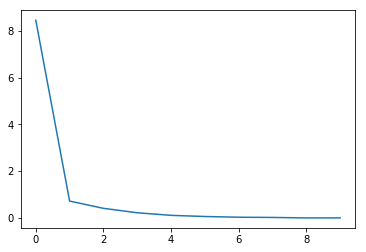

In [43]:
plt.plot(eigenvalues)
plt.show()

* We should keep only <b>the first component</b> because it is greater than 1 and it is where the elbow has the slope with the biggest dramatic change. 

In [44]:
classifier = LogisticRegression()
classifier.fit(Y_sklearn, murder_df_scaled['Murder'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
# you can make this a lot easier using Pipeline

from sklearn.pipeline import Pipeline

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA()),
                 ('tree', LogisticRegression())])

pipe.fit( murder_df_scaled.drop(['Murder' ], axis=1) ,murder_df_scaled['Murder'] )

newdata = murder_pca

pipe.predict(newdata)

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [46]:
from sklearn.cross_validation import cross_val_score
print (cross_val_score(pipe, murder_df_scaled.drop(['Murder' ], axis=1) ,murder_df_scaled['Murder'] ))


[0.478 0.904 0.868]


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### I don't know how to interpret this result. Why are only 3 values?

## Fitting a Ridge logistic regression model using SKLearn